In [1]:
from usde.usde import USDE

# Linkedin Api's credentials
api_credentials = {'access_token': " "}
# Create usde
usde = USDE()

linkedin = usde.get_linkedin(api_credentials)

In [2]:
# Create a graph and naming the graph type inside usde first and then modify the graph
graph = usde.create_graph("pandas")
linkedin.fetch_self_node(graph)
nodes = graph.get_nodes()
df = nodes["position"]
df.head(10)

,_id,Label,label_attribute,company,company_id,company_industry,company_name,company_size,company_type,is_current,location,start_month,start_year,summary
0,1362428103,Course Producer for CSCI 310: Software Enginee...,Position,"{'id': 3221523, 'industry': 'Higher Education'...",3221523,Higher Education,USC Viterbi School of Engineering,10001+,Educational,True,"Los Angeles, CA",8,2018,Held office hours to answer students’ question...
1,1362429330,Course Producer for CSCI 201: Principles of So...,Position,"{'id': 3221523, 'industry': 'Higher Education'...",3221523,Higher Education,USC Viterbi School of Engineering,10001+,Educational,True,"Los Angeles, CA",8,2018,Held office hours to answer students’ question...


In [3]:
df = nodes["profile"]
df.head(10)

,_id,Label,label_attribute,first_name,last_name,headline,industry,location,location_name,location_country,num_connections,num_connections_capped,picture_url,summary
0,pUJXmhGP5s,Zifan Shi,Profile,Zifan,Shi,Course Producer for CSCI 201: Principles of So...,Computer Software,"{'country': {'code': 'us'}, 'name': 'Greater L...",Greater Los Angeles Area,us,59,False,https://media.licdn.com/dms/image/C5603AQEYCCJ...,Major in Computer Science (Senior Year) and Mi...


# Visualization with NetworkX

In [4]:
import networkx as nx

nx_graph = nx.Graph();

edges = graph.get_edges()

In [9]:
# create graph from edgelist dataframes
for key in edges:
    
    new_graph = nx.from_pandas_edgelist(
        edges[key], source="Source", target="Target", edge_attr=True)
    
    nx_graph = nx.compose(nx_graph, new_graph)

In [10]:
# Add node attributes
for key in nodes:
    df = nodes[key]
    
    for index, row in df.iterrows():
        _id = row["_id"]
        node = nx_graph.node[_id]
        
        for row_key in row.keys():
            node[row_key] = row[row_key]

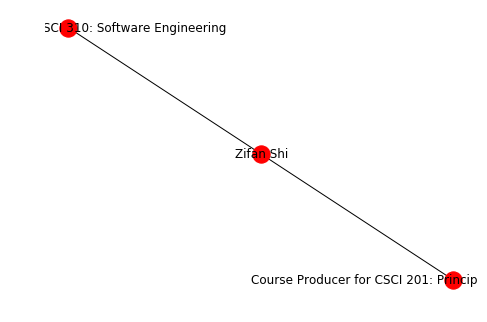

In [14]:
# Draw the graph with node labels
labels = dict((node, data["Label"]) for node, data in nx_graph.nodes(data=True))
nx.draw(nx_graph, labels=labels)

In [15]:
pos = nx.spring_layout(nx_graph)
edge_labels = {}
for edge in nx_graph.edges(data=True):
    key = (edge[0], edge[1])
    edge_labels[key] = edge[2]["Label"]

{('pUJXmhGP5s', '1362428103'): Text(0.0994734,-0.499532,'hasPosition'),
 ('pUJXmhGP5s', '1362429330'): Text(-0.0995661,0.5,'hasPosition')}

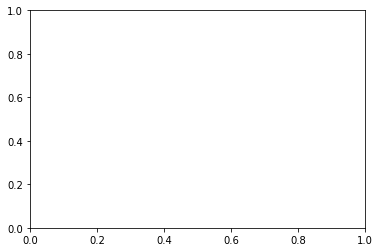

In [16]:
# Draw networkx labels
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_color="red")